# COMPUTATIONAL PHOTOGRAPHY PROJECT

IMAGE MASKING(INPAINTING)

In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('scene13.jpg')
mask = cv.imread('scene10.jpg', cv.IMREAD_GRAYSCALE)

dst = cv.inpaint(img,mask,3,cv.INPAINT_TELEA)

cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

IMAGE DENOISING(REMOVE NOISE FROM COLOUR IMAGE)

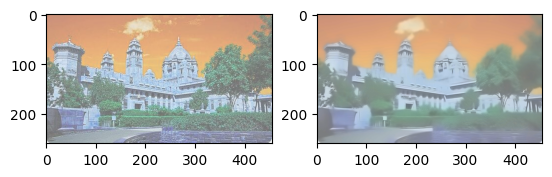

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene5 (1).jpg')

dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

GENERATE HDR IMAGE FROM AN EXPOSURE IMAGE

In [3]:
import cv2 as cv
import numpy as np

# Loading exposure images into a list
img_fn = ["scene4 (1).jpg", "scene5 (1).jpg", "scene6 (1).jpg", "scene7.jpg"]
img_list = [cv.imread(fn) for fn in img_fn]
exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

In [4]:
# Merge exposures to HDR image
merge_debevec = cv.createMergeDebevec()
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy())
merge_robertson = cv.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())

In [5]:
# Tonemap HDR image
tonemap1 = cv.createTonemap(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())

In [6]:
# Exposure fusion using Mertens
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

In [7]:
import numpy as np
import cv2 as cv

# Assuming res_debevec is your floating-point HDR image
# Handle NaN and Inf values by replacing them with 0
res_debevec_cleaned = np.nan_to_num(res_debevec, nan=0.0, posinf=0.0, neginf=0.0)

# Scale the cleaned image and clip to valid uint8 range
res_debevec_scaled = np.clip(res_debevec_cleaned * 255, 0, 255)

# Convert to uint8
res_debevec_8bit = res_debevec_scaled.astype('uint8')

# Save the image
cv.imwrite("result.jpg", res_debevec_8bit)


True

FAST FEATURE DETECTOR

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene8.png', cv.IMREAD_GRAYSCALE) # `<opencv_root>/samples/data/blox.jpg`

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

cv.imwrite('fast_true.png', img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

cv.imwrite('fast_false.png', img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 254
Total Keypoints without nonmaxSuppression: 1290


True

FEATURE POINT DESCRIPTOR USING BRIEF METHOD

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene9.jpg', cv.IMREAD_GRAYSCALE)

# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

print( brief.descriptorSize() )
print( des.shape )

32
(554, 32)


ORB (FAST KEYPOINT DETECTOR)

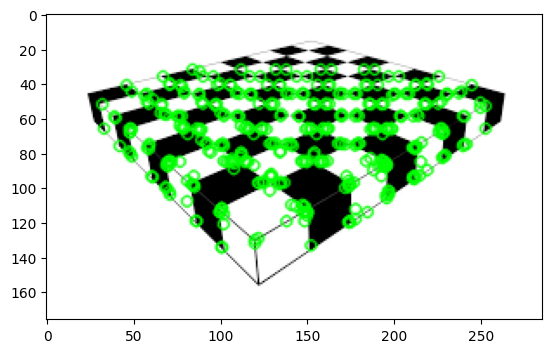

(<matplotlib.image.AxesImage at 0x1bd3dda4670>, None)

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene8.png', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

BRUTE-FORCE MATCHING WITH ORB DECTECTORS

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('scene6 (1).jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('scene7.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

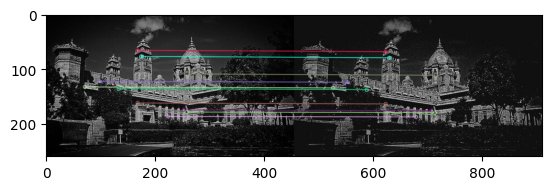

(<matplotlib.image.AxesImage at 0x1bd418e6070>, None)

In [13]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()

Brute-Force Matching with SIFT Descriptors and Ratio Test

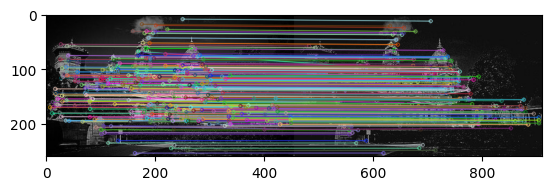

(<matplotlib.image.AxesImage at 0x1bd418d7c10>, None)

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('scene6 (1).jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('scene7.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()

FLANN BASED MATCHER

In [15]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [16]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
 table_number = 6, # 12
 key_size = 12, # 20
 multi_probe_level = 1) #2

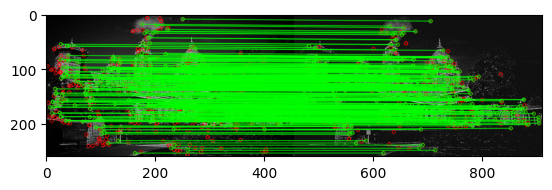

(<matplotlib.image.AxesImage at 0x1bd3ff7cf40>, None)

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('scene6 (1).jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('scene7.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
singlePointColor = (255,0,0),
matchesMask = matchesMask,
flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

FEATURE MATCHING + HOMOGRAPHY TO FIND KNOWN OBJECTS IN A COMPLEX IMAGE

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv.imread('scene6 (1).jpg', cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('scene7.jpg', cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [19]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)

    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)

else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None  

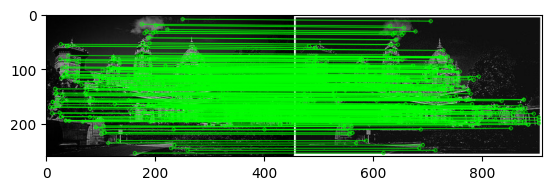

(<matplotlib.image.AxesImage at 0x1bd419474f0>, None)

In [20]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
singlePointColor = None,
matchesMask = matchesMask, # draw only inliers
flags = 2)

img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

TRACK GOOD FEATURES(SELECTED) USING SHI-TOMASI DETECTOR

C:\Users\hp\AppData\Local\Temp\ipykernel_5548\1950149546.py:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


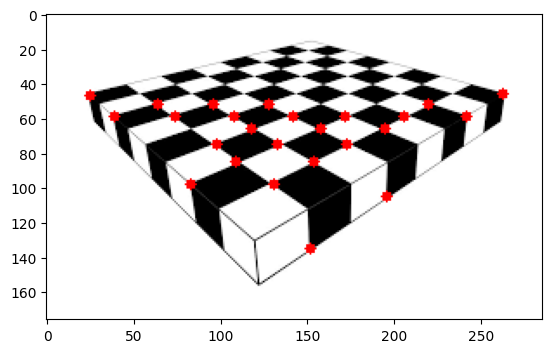

(<matplotlib.image.AxesImage at 0x1bd4c2d8df0>, None)

In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene8.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

CORNER DETECTION

In [22]:
import numpy as np
import cv2 as cv

filename = 'scene9.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

REFINES THE DETECTED CORNERS USING SUB-PIXEL ACCURACY 

In [23]:
import numpy as np
import cv2 as cv

filename = 'scene7.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv.imwrite('result1.png',img)

C:\Users\hp\AppData\Local\Temp\ipykernel_5548\3502020272.py:24: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


True

TRACK BLUE COLOUR OBJECTS

In [24]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [25]:
import cv2 as cv
import numpy as np

def main():
    cap = cv.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame")
            break

        # Convert BGR to HSV
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

        # Define range of blue color in HSV
        lower_blue = np.array([110, 50, 50])
        upper_blue = np.array([130, 255, 255])

        # Threshold the HSV image to get only blue colors
        mask = cv.inRange(hsv, lower_blue, upper_blue)

        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame, frame, mask=mask)

        # Display the frames
        cv.imshow('Original Frame', frame)
        cv.imshow('Mask (Blue Color)', mask)
        cv.imshow('Result (Masked Frame)', res)

        # Press 'q' to exit the loop
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and close all windows
    cap.release()
    cv.destroyAllWindows()

if __name__ == "__main__":
    main()


KeyboardInterrupt: 

In [26]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


TRACK RED COLOUR OBJECTS

In [1]:
import cv2 as cv
import numpy as np

def main():
    cap = cv.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Error: Failed to capture frame")
            break

        # Convert BGR to HSV
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

        # Define range of red color in HSV
        lower_red = np.array([0, 50, 50])
        upper_red = np.array([10, 255, 255])
        mask1 = cv.inRange(hsv, lower_red, upper_red)

        lower_red = np.array([170, 50, 50])
        upper_red = np.array([180, 255, 255])
        mask2 = cv.inRange(hsv, lower_red, upper_red)

        mask = mask1 + mask2  # Combine masks for both ranges of red color

        # Bitwise-AND mask and original image
        res = cv.bitwise_and(frame, frame, mask=mask)

        # Display the frames
        cv.imshow('Original Frame', frame)
        cv.imshow('Mask (Red Color)', mask)
        cv.imshow('Result (Masked Frame)', res)

        # Press 'q' to exit the loop
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and close all windows
    cap.release()
    cv.destroyAllWindows()

if __name__ == "__main__":
    main()


KeyboardInterrupt: 

In [ ]:
red = np.uint8([[[0,255,255 ]]])
hsv_red = cv.cvtColor(red,cv.COLOR_BGR2HSV)
print( hsv_red )

[[[ 30 255 255]]]


GEOMETRIC TRANSFORMATION (SCALING)

In [29]:
import numpy as np
import cv2 as cv

img = cv.imread('scene10.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

TRANSLATION(SHIFTING OBJECT LOCATION)

In [2]:
import numpy as np
import cv2 as cv

img = cv.imread('scene10.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

TRANSFORMED DIMENSIONS OF IMAGE

In [ ]:
pip install open-cv

In [1]:
img = cv.imread('scene10.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

NameError: name 'cv' is not defined

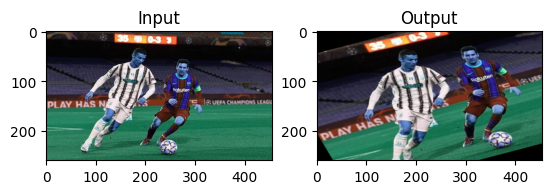

In [12]:
img = cv.imread('scene10.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)

dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

IMAGE FILTERING

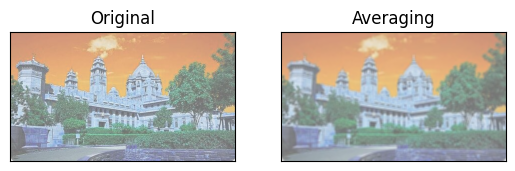

In [66]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene5 (1).jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

IMAGE BLURRING(SMOOTHING)

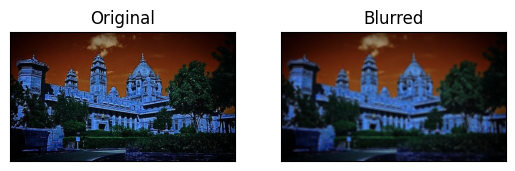

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('scene6 (1).jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

blur = cv.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

FIND IMAGE GRADIENTS , EDGES

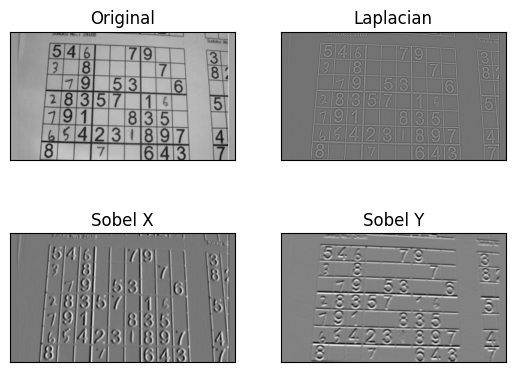

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene11.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

DETECT CIRCLE IN IMAGE

In [4]:
import numpy as np
import cv2 as cv

img = cv.imread('scene12.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
# draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
# draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

INTERACTIVE BACKGROUND EXTRACTION USING GRABCUT ALGORITHM

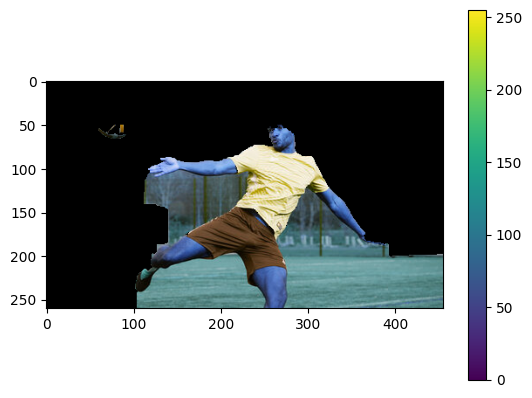

(<matplotlib.image.AxesImage at 0x27afacdd3a0>,
 None)

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('scene13.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

TRACKBAR OF COLOUR IMAGE

In [6]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)

cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

# get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


ADDITION OF IMAGE INTO IMAGE

In [7]:
img1 = cv.imread('scene12.jpg')
img2 = cv.imread('scene1.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
 
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
 
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()